In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# k Nearest Neighbour

- k-NN is a straightforward classification algorithm based on the idea that similar instances should have similar class labels.
- To classify a new data point, k-NN looks at the class labels of its nearest neighbors in the training data.
- It assigns the most frequent class label among the k nearest neighbors to the new data point as its predicted class.

# Naive Bayes

- Naive Bayes is a classification algorithm based on Bayes' theorem and probability theory.
- It assumes that the features are conditionally independent given the class label, which simplifies the calculation of probabilities.
- Naive Bayes calculates the probability of each class label given the input features and selects the class with the highest probability as the prediction.

In [8]:
# Import dataset
df = pd.read_csv(r"E:\HSNC\SEM 2\ML\Social_Network_Ads.csv")

In [9]:
df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [10]:
# Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [14]:
# # Checking for duplicate values
# We wont't remove this duplicate values as the dataset might have people with same age and salary
df.duplicated().value_counts()

False    367
True      33
dtype: int64

<Axes: >

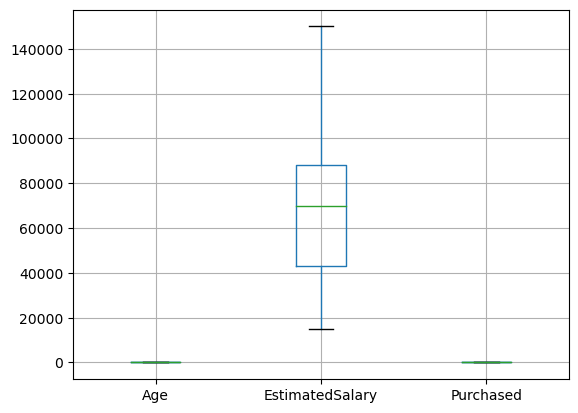

In [15]:
# Checking for outliers
df.boxplot()

In [16]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [17]:
# Independent variable
x = df.iloc[:,0:2] 

In [18]:
# dependent vatiable
y = df['Purchased']

In [19]:
# StandardScaler is used for standardization
# Standardization means it scales the features (variables) so that they have a mean of 0 and a standard deviation of 1.
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x).transform(x)

In [20]:
# Initializing training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 1)

In [22]:
# Training the a Logistic Regression model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train,y_train)
LR

LogisticRegression()

In [23]:
# Predicting the data based upon training model
y_pred = LR.predict(X_test)

In [24]:
# Checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.83

In [25]:
# Check logistic regressio noteebook for confusion matrix explaination
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[52,  6],
       [11, 31]], dtype=int64)

In [26]:
TP = con_matrix[1,1]
TN = con_matrix[0,0]
FP = con_matrix[0,1]
FN = con_matrix[1,0]

In [27]:
precision = TP / (TP + FP)
precision

0.8378378378378378

In [28]:
recall =  TP / (TP + FN)
recall

0.7380952380952381

In [29]:
Acc = (TP+TN) / (TP+TN+FP+FN)
Acc

0.83

In [31]:
import statsmodels.api as sm 
log_reg = sm.Logit(y,X).fit() 

Optimization terminated successfully.
         Current function value: 0.417155
         Iterations 7


In [32]:
# Using logit to fit model and get a summary of model
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Thu, 22 Feb 2024   Pseudo R-squ.:                  0.3602
Time:                        19:20:19   Log-Likelihood:                -166.86
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 9.373e-43
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0150      0.216      9.313      0.000       1.591       2.439
x2             1.0723      0.174      6.159      0.000       0.731       1.414


# KNN

In [33]:
# Training the a KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
y1_pred = classifier.predict(X_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1),y_test.values.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y1_pred)

0.88

In [36]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[52,  6],
       [11, 31]], dtype=int64)

# Naive Bayes

In [37]:
# Training the a Naive Bayes model
from sklearn.naive_bayes import GaussianNB
class_nb = GaussianNB()
class_nb .fit(X_train,y_train)

GaussianNB()

In [38]:
y2_pred = class_nb.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y2_pred)

0.86

In [40]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test,y2_pred)
con_matrix

array([[51,  7],
       [ 7, 35]], dtype=int64)